In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection And Analysis


In [ ]:
#Loading the Data From  csv file to a pandas dataframe
import pandas as pd
medical_insurance_dataset = pd.read_csv('/content/medical_insurance.csv')

In [ ]:
#first five rows of the dataframe
medical_insurance_dataset.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
#number of rows and coumns
medical_insurance_dataset.shape

(2772, 7)

In [ ]:
#getting some information about the dataset
medical_insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


CAtegorical Features:
-sex
-Smoker
-Region

In [ ]:
#Checking For missing values
medical_insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [ ]:
#Statistical Measures of the Dataset
medical_insurance_dataset.describe()

age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
#The distribution of age value
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()


<ipython-input-10-e9408d4023c6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_insurance_dataset['age'])


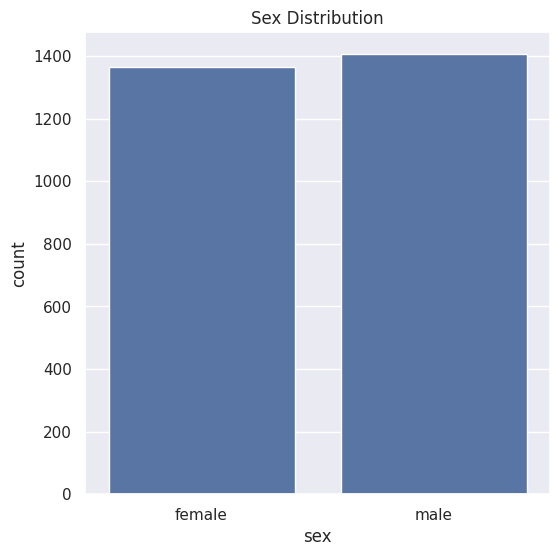

In [ ]:
#distribution for Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical_insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
medical_insurance_dataset['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

In [ ]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

<ipython-input-13-37a800857531>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_insurance_dataset['bmi'])


Normal BMI Range-->18.5to 24.9

In [ ]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=medical_insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
medical_insurance_dataset['children'].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

In [ ]:
#Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=medical_insurance_dataset)
plt.title('Smoker')
plt.show()

In [ ]:
medical_insurance_dataset['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

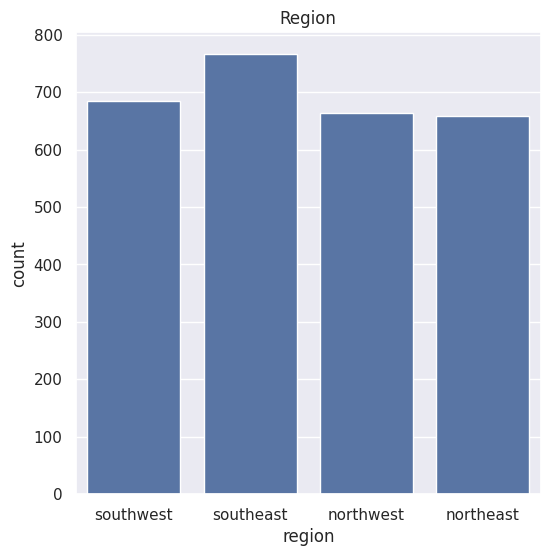

In [ ]:
#Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=medical_insurance_dataset)
plt.title('Region')
plt.show()

In [ ]:
medical_insurance_dataset['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [ ]:
#distribution of Charges Value
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

<ipython-input-20-ddb941b225db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_insurance_dataset['charges'])


Data Preprocessing

Encoding the Categorical features

In [ ]:
#encoding sex column
medical_insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding 'smoker' column
medical_insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding 'region' column
medical_insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [ ]:
medical_insurance_dataset.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520

Splitting The features and target

In [ ]:
X = medical_insurance_dataset.drop(columns='charges',axis=1)
Y = medical_insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


Splitting the Data into training data & Testing Data

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split before using it.

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2772, 6) (2217, 6) (555, 6)


Model Training
Linear Regressin

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#Prediction on Training Data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R Squared Value
from sklearn import metrics
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Value:',r2_train)

R Squared Value: 0.7561940076387632


In [ ]:
#Prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Value:',r2_test)

R Squared Value: 0.7272408044903713


Building a Predictive System

In [ ]:
import numpy as np
input_data = (31,1,25.74,0,1,0)

#changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])





[3466.43009475]
The insurance cost is USD 3466.430094748601


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
import pickle

import pickle

# assuming your model is named `model`
with open('Medical Insurance Cost Prediction.pkl', 'wb') as f:
    pickle.dump('Medical Insurance Cost Prediction', f)